In [1]:
import pandas as pd
import matplotlib.pyplot as plt

### Data

In [2]:
data_large = pd.read_parquet('data/text_large.parquet')
data_small = pd.read_parquet('data/text_small.parquet')

In [3]:
percentage_diff_data = ((data_large.shape[0] - data_small.shape[0]) / data_small.shape[0]) * 100

In [4]:
print(f'Percentage difference between the large and small dataset: {percentage_diff_data:.2f}%')

Percentage difference between the large and small dataset: 1200.00%


In [22]:
data_large['sentence_length'] = data_large['text'].apply(lambda x: len(x.split()))
average_length = data_large['sentence_length'].mean()

print(f'Average sentence length in the large dataset: {average_length} words')

Average sentence length in the large dataset: 134.09808923076923


In [25]:
data_large.head()

,label,text,sentence_length
0,4,dr. goldberg offers everything i look for in a...,93
1,1,"Unfortunately, the frustration of being Dr. Go...",115
2,3,Been going to Dr. Goldberg for over 10 years. ...,97
3,3,Got a letter in the mail last week that said D...,53
4,0,I don't know what Dr. Goldberg was like before...,211


In [23]:
data_small['sentence_length'] = data_small['text'].apply(lambda x: len(x.split()))
average_length = data_small['sentence_length'].mean()

print(f'Average sentence length in the small dataset: {average_length} words')

Average sentence length in the small dataset: 134.29098 words


### Parquet

In [5]:
parquet_large = pd.read_json('results/parquet/large/parquet-performance.json',convert_dates=False)
parquet_large_usage = pd.read_json('results/parquet/large/resource_usage.json',convert_dates=False)

parquet_small = pd.read_json('results/parquet/small/parquet-performance.json',convert_dates=False)
parquet_small_usage = pd.read_json('results/parquet/small/resource_usage.json',convert_dates=False)

#### Text File

In [6]:
file_large = pd.read_json('results/text/large/file-performance.json',convert_dates=False)
file_large_usage = pd.read_json('results/text/large/resource_usage.json',convert_dates=False)

file_small = pd.read_json('results/text/small/file-performance.json',convert_dates=False)
file_small_usage = pd.read_json('results/text/small/resource_usage.json',convert_dates=False)

### Analysis

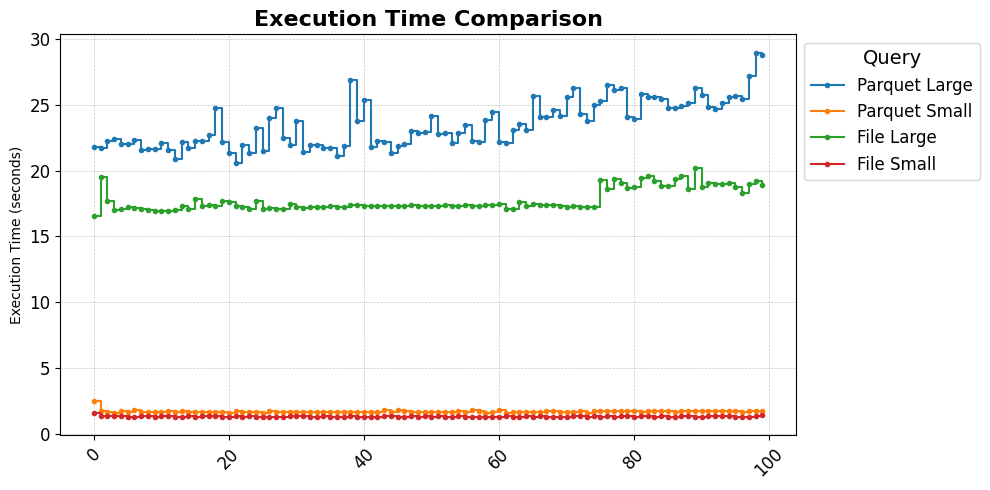

In [7]:
fig, ax = plt.subplots(figsize=(10, 5))

parquet_large['execution_time_seconds'].plot(
    ax=ax, label="Parquet Large", drawstyle="steps-post", marker="o",markersize = 3
)
parquet_small['execution_time_seconds'].plot(
    ax=ax, label="Parquet Small", drawstyle="steps-post", marker="o",markersize = 3
)
file_large['execution_time_seconds'].plot(
    ax=ax, label="File Large", drawstyle="steps-post", marker="o",markersize = 3
)
file_small['execution_time_seconds'].plot(
    ax=ax, label="File Small", drawstyle="steps-post", marker="o",markersize = 3
)

ax.set_title("Execution Time Comparison", fontsize=16, weight='bold')
ax.set_ylabel("Execution Time (seconds)", fontsize=10)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.xticks(fontsize=12, rotation=45)
plt.yticks(fontsize=12)

ax.legend(title="Query", fontsize=12, title_fontsize=14, loc="upper left", bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()


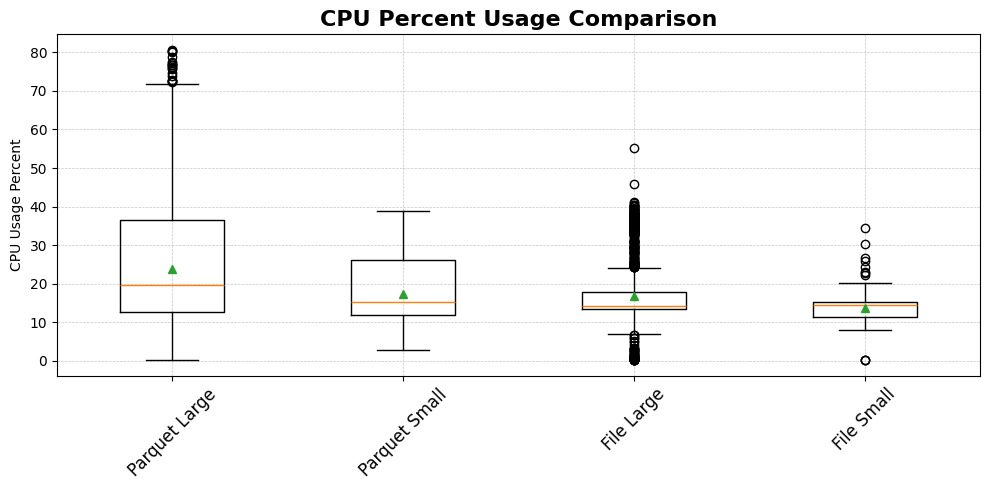

In [8]:
fig, ax = plt.subplots(figsize=(10, 5))

data = [
    parquet_large_usage[parquet_large_usage['cpu_percent'] != 0.0]['cpu_percent'],
    parquet_small_usage[parquet_small_usage['cpu_percent'] != 0.0]['cpu_percent'],
    file_large_usage[file_large_usage['cpu_percent'] != 0.0]['cpu_percent'],
    file_small_usage[file_small_usage['cpu_percent'] != 0.0]['cpu_percent']
]

ax.boxplot(data,showmeans=True)

ax.set_title("CPU Percent Usage Comparison", fontsize=16, weight='bold')
ax.set_xticklabels(["Parquet Large", "Parquet Small", "File Large", "File Small"], fontsize=12, rotation=45)
ax.set_ylabel("CPU Usage Percent", fontsize=10)

ax.grid(True, which='both', linestyle='--', linewidth=0.5, alpha=0.7)

plt.tight_layout()

plt.show()


In [9]:
parquet_large_cpu = parquet_large_usage[parquet_large_usage['cpu_percent'] != 0.0]['cpu_percent']
parquet_small_cpu = parquet_small_usage[parquet_small_usage['cpu_percent'] != 0.0]['cpu_percent']
file_large_cpu = file_large_usage[file_large_usage['cpu_percent'] != 0.0]['cpu_percent']
file_small_cpu = file_small_usage[file_small_usage['cpu_percent'] != 0.0]['cpu_percent']

mean_parquet_large = parquet_large_cpu.mean()
mean_parquet_small = parquet_small_cpu.mean()
mean_file_large = file_large_cpu.mean()
mean_file_small = file_small_cpu.mean()

percentage_diff_parquet = ((mean_parquet_large - mean_parquet_small) / mean_parquet_small) * 100
percentage_diff_file = ((mean_file_large - mean_file_small) / mean_file_small) * 100

percentage_diff_large = ((mean_parquet_large - mean_file_large) / mean_file_large) * 100
percentage_diff_small = ((mean_parquet_small - mean_file_small) / mean_file_small) * 100

print(f"Percentage difference between Parquet large and small means: {percentage_diff_parquet:.2f}%")
print(f"Percentage difference between File large and small means: {percentage_diff_file:.2f}%")
print(f"Percentage difference between Parquet and File large means: {percentage_diff_large:.2f}%")
print(f"Percentage difference between Parquet and File small means: {percentage_diff_small:.2f}%")



Percentage difference between Parquet large and small means: 36.06%
Percentage difference between File large and small means: 22.35%
Percentage difference between Parquet and File large means: 40.23%
Percentage difference between Parquet and File small means: 26.09%


In [10]:
mean_parquet_large = parquet_large['execution_time_seconds'].mean()
mean_parquet_small = parquet_small['execution_time_seconds'].mean()
mean_file_large = file_large['execution_time_seconds'].mean()
mean_file_small = file_small['execution_time_seconds'].mean()

percentage_diff_parquet = ((mean_parquet_large - mean_parquet_small) / mean_parquet_small) * 100
percentage_diff_file = ((mean_file_large - mean_file_small) / mean_file_small) * 100

percentage_diff_large = ((mean_parquet_large - mean_file_large) / mean_file_large) * 100
percentage_diff_small = ((mean_parquet_small - mean_file_small) / mean_file_small) * 100

print(f"Percentage difference between Parquet large and small means: {percentage_diff_parquet:.2f}%")
print(f"Percentage difference between File large and small means: {percentage_diff_file:.2f}%")
print(f"Percentage difference between Parquet and File large means: {percentage_diff_large:.2f}%")
print(f"Percentage difference between Parquet and File small means: {percentage_diff_small:.2f}%")



Percentage difference between Parquet large and small means: 1291.18%
Percentage difference between File large and small means: 1250.56%
Percentage difference between Parquet and File large means: 32.57%
Percentage difference between Parquet and File small means: 28.70%
